In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Visualizing some Emergency 911 calls US data

My first data capstone project for my Udemy Data Science and ML Bootcamp, by Jose Portilla of Udemy.

https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp

Don't expect much, it is just meant to practice my visualization and pandas skills.



In [2]:
#Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Data (https://www.kaggle.com/mchirico/montcoalert)
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [3]:
df.keys()

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [4]:
topzips=df['zip'].value_counts().head(5)
toptowns=df['twp'].value_counts().head(5)

toptowns, topzips

(LOWER MERION    36441
 ABINGTON        25835
 NORRISTOWN      23883
 UPPER MERION    22694
 CHELTENHAM      19629
 Name: twp, dtype: int64, 19401.0    28656
 19464.0    27948
 19403.0    21631
 19446.0    20496
 19406.0    14097
 Name: zip, dtype: int64)

**Do toptowns contains such zips? Now we check that 4 zips do**

In [5]:
toptownsinfo = pd.concat( [ df[df['twp']==x] for x in list(toptowns.keys())] )

list( set(toptownsinfo['zip']) &  set(topzips.keys()) )


[19401.0, 19403.0, 19406.0, 19446.0]

## Whats the most common reasons?

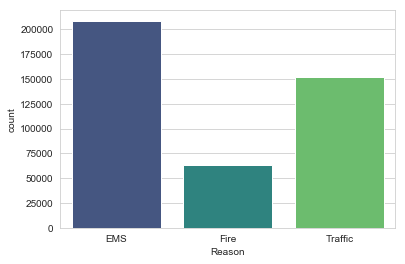

In [6]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
sns.countplot(x='Reason',data=df,palette='viridis')

**Does it varies with time?**

In [7]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# formating day fo week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

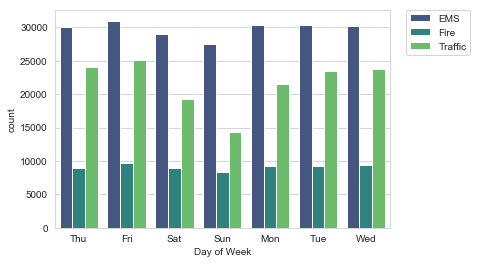

In [8]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # To relocate the legend

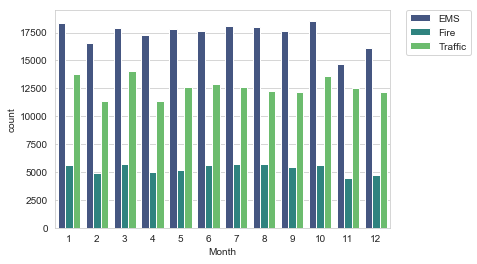

In [9]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)# To relocate the legend

**Variation by months/date**

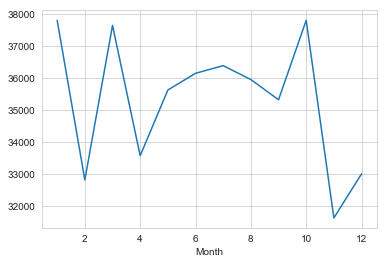

In [10]:
byMonth = df.groupby('Month').count()
byMonth['twp'].plot()

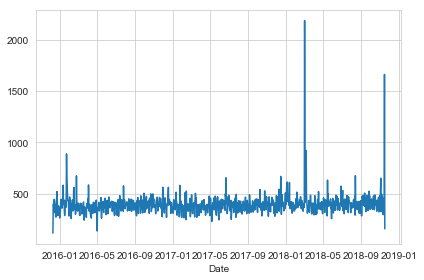

In [11]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

# On the day/hour relation to reports number

In [12]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


<Figure size 864x432 with 0 Axes>

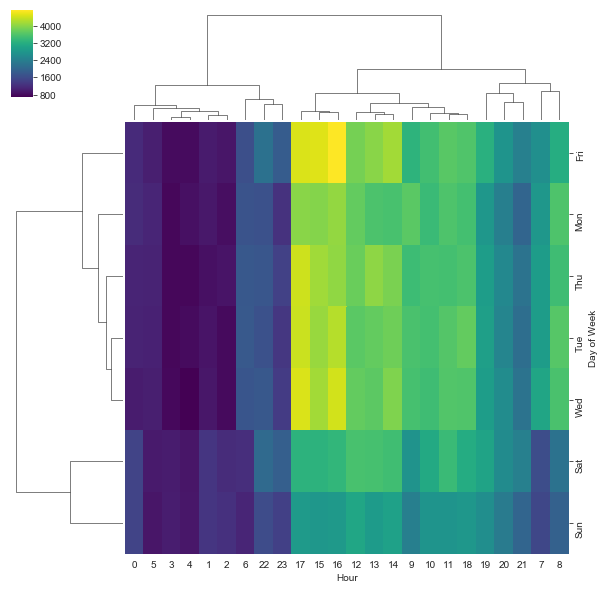

In [13]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='viridis')

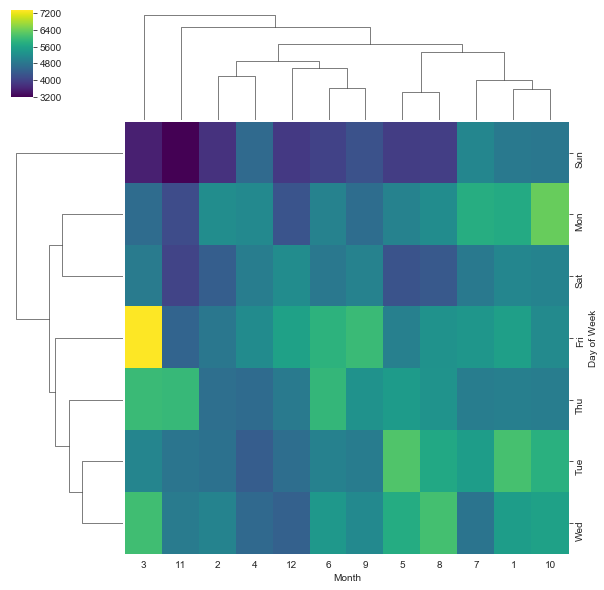

In [14]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
sns.clustermap(dayMonth,cmap='viridis')
